<a href="https://colab.research.google.com/github/rosarionapoli/Data-Science/blob/main/Proyecto_ParteIII_Napoli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación del proyecto


**Abstracto con Motivación y Audiencia**

La violencia de género sigue siendo una preocupación significativa a nivel mundial, y en Argentina, el análisis de las denuncias registradas por la Línea 144 en 2022 proporciona una perspectiva crucial sobre esta problemática. Este estudio se centra en identificar patrones y tendencias en las denuncias de violencia, explorando variables clave como el género de las víctimas y agresores, la distribución temporal de las denuncias, y la relación entre la edad de las personas que denuncian y el tipo de violencia sufrida. Además, se construye un modelo de machine learning utilizando Regresión Logística para predecir si un caso de denuncia corresponde a violencia física, basándose en las características del reporte.

La motivación detrás de este proyecto radica en la necesidad de comprender mejor la dinámica de la violencia de género en Argentina para informar políticas públicas y estrategias de intervención más efectivas. Identificar patrones en las denuncias y desarrollar modelos predictivos puede contribuir a la prevención de la violencia y al desarrollo de recursos más adecuados para las víctimas.

La audiencia de este estudio incluye profesionales en el ámbito de la salud, organizaciones de apoyo a víctimas de violencia, responsables de la formulación de políticas públicas, y el público en general interesado en la problemática de la violencia de género.

**Contexto Comercial y Analítico**

En un entorno donde la violencia de género representa una carga significativa para la sociedad, el análisis de las denuncias registradas por la Línea 144 proporciona una oportunidad para identificar factores que podrían contribuir a la violencia y desarrollar intervenciones preventivas. Este estudio se basa en un conjunto de datos que incluye información sobre el género, la edad, la provincia, y la nacionalidad de los denunciantes, así como detalles sobre el tipo de violencia sufrida.

El análisis exploratorio de los datos y la aplicación de técnicas analíticas permitirán identificar patrones significativos, como la relación entre el género de las víctimas y los agresores, las épocas del año con mayor incidencia de denuncias, y las provincias con mayor número de reportes. Además, se construye un modelo de machine learning para predecir la probabilidad de que un caso de denuncia corresponda a violencia física. Este modelo se basa en las características del reporte para proporcionar una herramienta que pueda ayudar en la identificación temprana de casos de violencia física.

**Fuente**

Los datos utilizados en este análisis se obtienen de los registros de la línea 144.

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

1. Los meses con más denuncias coinciden con períodos de mayor estrés social o familiar, mientras que los meses con menos denuncias se relacionan con períodos festivos o de menor actividad pública.
2. Las provincias más pobladas y urbanizadas tienen más denuncias.
3. La mayoría de las víctimas son mujeres y la mayoría de los agresores son hombres.
4. Los jóvenes y adultos jóvenes son quienes más utilizan el servicio debido a una mayor conciencia social y acceso a recursos.
5. Las nacionalidades de los denunciantes distintas de la argentina provienen de países limítrofes, que representan a la gran mayoría de la población extranjera en el país.
6. En las víctimas más jóvenes predomina la violencia sexual y psicológica, mientras que en las mayores predomina la violencia física.

**Objetivo**

El objetivo principal del proyecto es desarrollar un análisis detallado y construir un modelo de Machine Learning para determinar la probabilidad de que un caso de denuncia corresponda a violencia física. Se busca proporcionar información crucial para informar políticas públicas y estrategias de intervención destinadas a prevenir y mitigar el impacto de la violencia de género en la sociedad.

Para lograr este objetivo, podríamos utilizar un enfoque de clasificación binaria, donde el modelo intentará predecir si una denuncia tiene altas probabilidades de ser de violencia física, con la variable "Violencia Física" (0 es No, 1 es Si).
Un modelo adecuado para implementar es Logistic Regression.


# Lectura del Dataset


In [136]:
#Cargo el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

linea144 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/linea144-enero-diciembre-2022.csv')

linea144.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24558 entries, 0 to 24557
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Fecha                                              24558 non-null  object 
 1   prov_residencia_persona_en_situacion_violencia     24236 non-null  object 
 2   genero_persona_en_situacion_de_violencia           23939 non-null  object 
 3   edad_persona_en_situacion_de_violencia             19577 non-null  float64
 4   pais_nacimiento_persona_en_situacion_de_violencia  16407 non-null  object 
 5   tipo_de_violencia_fisica                           24558 non-null  object 
 6   tipo_de_violencia_psicologica                      24558 non-null  object 
 7   tipo_de_violencia_sexual                           24558 non-null  object 
 8   tipo_de_violencia_economica_y_patrimonial          24558 non-null  object 
 9   tipo_d

# Limpieza y transformación de datos

In [137]:
#Elimino las columnas "Unnamed"
linea144 = linea144.drop(columns=[col for col in linea144.columns if 'Unnamed' in col])
linea144.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24558 entries, 0 to 24557
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Fecha                                              24558 non-null  object 
 1   prov_residencia_persona_en_situacion_violencia     24236 non-null  object 
 2   genero_persona_en_situacion_de_violencia           23939 non-null  object 
 3   edad_persona_en_situacion_de_violencia             19577 non-null  float64
 4   pais_nacimiento_persona_en_situacion_de_violencia  16407 non-null  object 
 5   tipo_de_violencia_fisica                           24558 non-null  object 
 6   tipo_de_violencia_psicologica                      24558 non-null  object 
 7   tipo_de_violencia_sexual                           24558 non-null  object 
 8   tipo_de_violencia_economica_y_patrimonial          24558 non-null  object 
 9   tipo_d

In [138]:
#Limpio los datos
linea144['prov_residencia_persona_en_situacion_violencia'].fillna('Desconocido', inplace=True)
linea144['pais_nacimiento_persona_en_situacion_de_violencia'].fillna('Otro', inplace=True)
linea144['genero_persona_en_situacion_de_violencia'].fillna('Desconocido', inplace=True)
linea144['vinculo_con_la_persona_agresora'].fillna('Otro', inplace=True)

linea144['genero_de_la_persona_agresora'] = linea144['genero_de_la_persona_agresora'].replace('Varon trans', 'Varon Trans')
linea144['genero_de_la_persona_agresora'].fillna('Desconocido', inplace=True)
linea144

,Fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
0,2022-01-01,Buenos Aires,Mujer,31.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
1,2022-01-01,Buenos Aires,Mujer,31.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Otro familiar,Varon
2,2022-01-01,Ciudad Autónoma de Buenos Aires,Mujer,29.0,Boliviana,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon
3,2022-01-01,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
4,2022-01-01,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24553,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,Otro,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
24554,2022-12-31,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
24555,2022-12-31,Desconocido,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Otro,Varon
24556,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Padre o tutor,Varon


In [139]:
#Renombro las columnas
linea144.rename(columns={'prov_residencia_persona_en_situacion_violencia': 'Provincia', 'genero_persona_en_situacion_de_violencia': 'Género', 'edad_persona_en_situacion_de_violencia': 'Edad', 'pais_nacimiento_persona_en_situacion_de_violencia':'Nacionalidad', 'tipo_de_violencia_fisica': 'Violencia física', 'tipo_de_violencia_psicologica':'Violencia psicológica', 'tipo_de_violencia_sexual':'Violencia sexual', 'tipo_de_violencia_economica_y_patrimonial':'Violencia económica y patrimonial','tipo_de_violencia_simbolica':'Violencia simbólica','tipo_de_violencia_domestica':'Violencia doméstica','modalidad_de_violencia_institucional':'Modalidad de violencia institucional','modalidad_de_violencia_laboral':'Modalidad de violencia laboral','modalidad_violencia_contra_libertad_reproductiva':'Modalidad de violencia contra la libertad reproductiva','modalidad_de_violencia_obstetrica':'Modalidad de violencia obstétrica','modalidad_de_violencia_mediatica':'Modalidad de violencia mediática','modalidad_de_violencia_otras':'Otras modalidades','vinculo_con_la_persona_agresora':'Vínculo','genero_de_la_persona_agresora':'Género de la persona agresora'}, inplace=True)
linea144


,Fecha,Provincia,Género,Edad,Nacionalidad,Violencia física,Violencia psicológica,Violencia sexual,Violencia económica y patrimonial,Violencia simbólica,Violencia doméstica,Modalidad de violencia institucional,Modalidad de violencia laboral,Modalidad de violencia contra la libertad reproductiva,Modalidad de violencia obstétrica,Modalidad de violencia mediática,Otras modalidades,Vínculo,Género de la persona agresora
0,2022-01-01,Buenos Aires,Mujer,31.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
1,2022-01-01,Buenos Aires,Mujer,31.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Otro familiar,Varon
2,2022-01-01,Ciudad Autónoma de Buenos Aires,Mujer,29.0,Boliviana,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon
3,2022-01-01,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
4,2022-01-01,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24553,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,Otro,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
24554,2022-12-31,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
24555,2022-12-31,Desconocido,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Otro,Varon
24556,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Padre o tutor,Varon


In [140]:
#Establezco el indice
linea144.index = range(1, len(linea144) + 1)
linea144

,Fecha,Provincia,Género,Edad,Nacionalidad,Violencia física,Violencia psicológica,Violencia sexual,Violencia económica y patrimonial,Violencia simbólica,Violencia doméstica,Modalidad de violencia institucional,Modalidad de violencia laboral,Modalidad de violencia contra la libertad reproductiva,Modalidad de violencia obstétrica,Modalidad de violencia mediática,Otras modalidades,Vínculo,Género de la persona agresora
1,2022-01-01,Buenos Aires,Mujer,31.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
2,2022-01-01,Buenos Aires,Mujer,31.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Otro familiar,Varon
3,2022-01-01,Ciudad Autónoma de Buenos Aires,Mujer,29.0,Boliviana,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon
4,2022-01-01,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
5,2022-01-01,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24554,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,Otro,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
24555,2022-12-31,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
24556,2022-12-31,Desconocido,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Otro,Varon
24557,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Padre o tutor,Varon


In [141]:
#Paso las fechas a formato datetime
linea144['Fecha'] = pd.to_datetime(linea144['Fecha'], format='%Y-%m-%d')
linea144

,Fecha,Provincia,Género,Edad,Nacionalidad,Violencia física,Violencia psicológica,Violencia sexual,Violencia económica y patrimonial,Violencia simbólica,Violencia doméstica,Modalidad de violencia institucional,Modalidad de violencia laboral,Modalidad de violencia contra la libertad reproductiva,Modalidad de violencia obstétrica,Modalidad de violencia mediática,Otras modalidades,Vínculo,Género de la persona agresora
1,2022-01-01,Buenos Aires,Mujer,31.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
2,2022-01-01,Buenos Aires,Mujer,31.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Otro familiar,Varon
3,2022-01-01,Ciudad Autónoma de Buenos Aires,Mujer,29.0,Boliviana,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon
4,2022-01-01,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
5,2022-01-01,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24554,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,Otro,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
24555,2022-12-31,Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
24556,2022-12-31,Desconocido,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Otro,Varon
24557,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,Otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,Padre o tutor,Varon


# Análisis exploratorio de datos

In [142]:
#Grafico 1: Denuncias por mes
conteo_por_mes = linea144['Fecha'].dt.to_period('M').value_counts().sort_index()
conteo_por_mes

,count
Fecha,
2022-01,2034
2022-02,1964
2022-03,2429
2022-04,2129
2022-05,2026
2022-06,1816
2022-07,1860
2022-08,2094
2022-09,2135


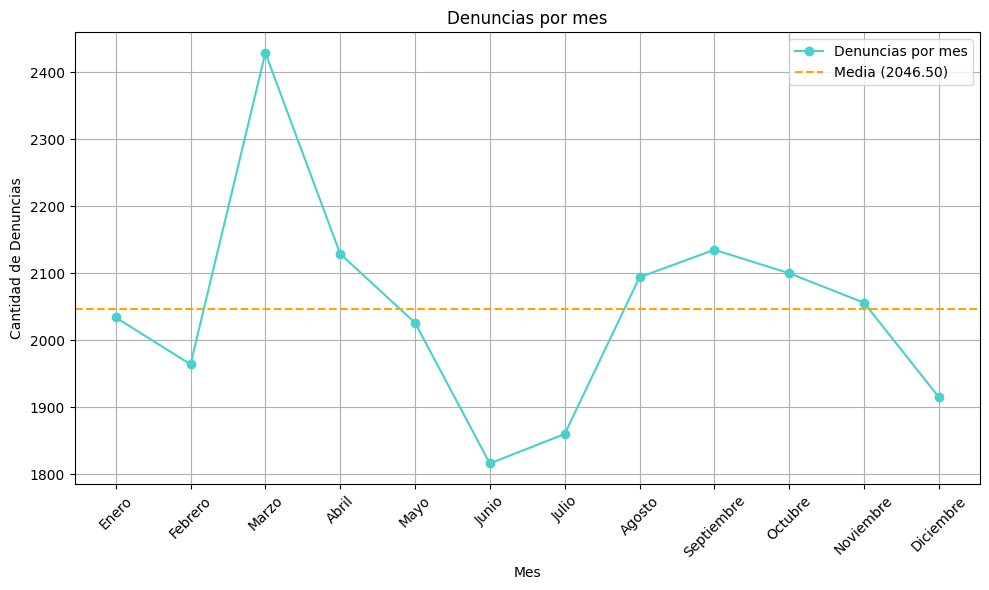

In [143]:
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio','Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

meses = [nombres_meses[mes.month - 1] for mes in conteo_por_mes.index]
conteo = conteo_por_mes.values
media = np.mean(conteo)
plt.figure(figsize=(10, 6))
plt.plot(meses, conteo, marker='o', linestyle='-', color='mediumturquoise', label='Denuncias por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Denuncias')
plt.axhline(y=media, color='orange', linestyle='--', label=f'Media ({media:.2f})')

plt.title('Denuncias por mes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Se puede observar que la media de denuncias es 1.631 denuncias por mes. La mayor cantidad de denuncias fueron registradas en marzo, lo que podría coincidir con el comienzo de las clases de los niños y el fin de las vacaciones. Además, la menor cantidad de registos es en junio, en la mitad del año, y en noviembre y diciembre, época de fiestas y celebraciones como Navidad y Año Nuevo.
Se confirma la hipotesis planteada anteriormente: los meses de mayores denuncias son los de mayor agitacion familiar, mientras los que menos denuncias presentan son los relacionados con las fiestas.

In [144]:
meses = linea144['Fecha'].value_counts().reset_index()
meses.columns = ['Fecha', 'Denuncias']
meses


,Fecha,Denuncias
0,2022-03-07,108
1,2022-03-28,97
2,2022-08-29,95
3,2022-03-04,94
4,2022-03-12,92
...,...,...
360,2022-07-20,40
361,2022-07-18,40
362,2022-06-10,40
363,2022-08-05,36


In [145]:
meses.sort_values(by='Fecha', inplace=True)
meses.reset_index(drop=True, inplace=True)
meses

,Fecha,Denuncias
0,2022-01-01,63
1,2022-01-02,69
2,2022-01-03,66
3,2022-01-04,55
4,2022-01-05,58
...,...,...
360,2022-12-27,65
361,2022-12-28,45
362,2022-12-29,52
363,2022-12-30,73


In [146]:
meses['Denuncias'].mean()


67.28219178082192

In [147]:
meses['Denuncias'].std()


11.286958126719876

In [148]:
datos_z=pd.DataFrame()
for j in meses.columns[1:]:
  datos_z[j] = (meses[j] - meses[j].mean()) / meses[j].std()
datos_z['Fecha']= meses.Fecha
datos_z

,Denuncias,Fecha
0,-0.379393,2022-01-01
1,0.152194,2022-01-02
2,-0.113599,2022-01-03
3,-1.088176,2022-01-04
4,-0.822382,2022-01-05
...,...,...
360,-0.202197,2022-12-27
361,-1.974154,2022-12-28
362,-1.353969,2022-12-29
363,0.506585,2022-12-30


In [149]:
datos_z['Label']= datos_z['Denuncias'].apply(lambda x: 'Atipico' if (x>2 or x<-2) else 'Normal')
datos_z.head()

,Denuncias,Fecha,Label
0,-0.379393,2022-01-01,Normal
1,0.152194,2022-01-02,Normal
2,-0.113599,2022-01-03,Normal
3,-1.088176,2022-01-04,Normal
4,-0.822382,2022-01-05,Normal


In [150]:
Meses= datos_z['Fecha'].dt.month_name()
datos_z['Meses']= Meses
datos_z

,Denuncias,Fecha,Label,Meses
0,-0.379393,2022-01-01,Normal,January
1,0.152194,2022-01-02,Normal,January
2,-0.113599,2022-01-03,Normal,January
3,-1.088176,2022-01-04,Normal,January
4,-0.822382,2022-01-05,Normal,January
...,...,...,...,...
360,-0.202197,2022-12-27,Normal,December
361,-1.974154,2022-12-28,Normal,December
362,-1.353969,2022-12-29,Normal,December
363,0.506585,2022-12-30,Normal,December


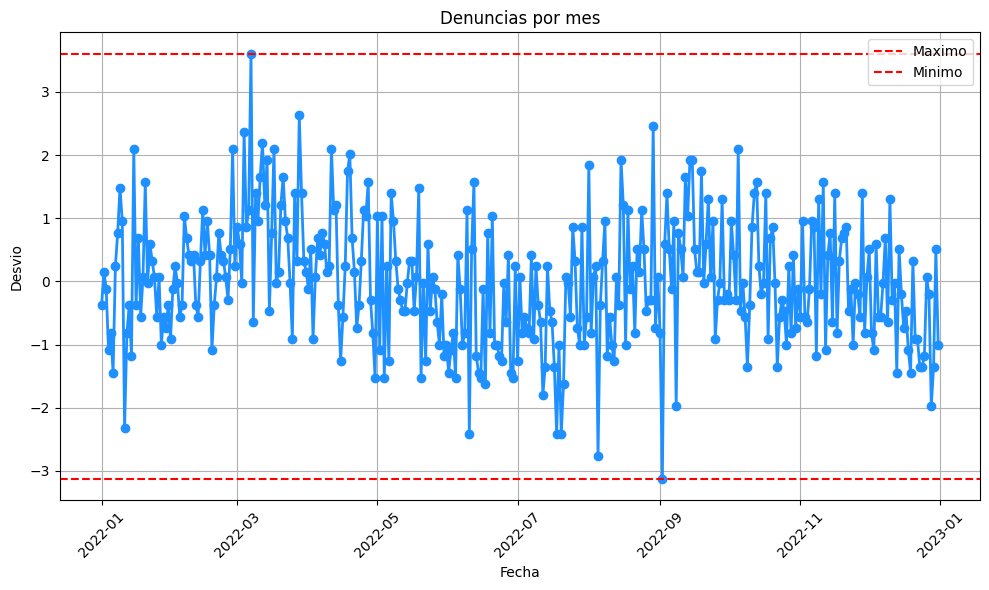

In [151]:

media_edad = datos_z['Denuncias'].mean()
std_edad = datos_z['Denuncias'].std()


plt.figure(figsize=(10, 6))
plt.plot(datos_z['Fecha'], datos_z['Denuncias'], marker='o', color='dodgerblue', linestyle='-', linewidth=2)
plt.axhline(y=max(datos_z['Denuncias']), color='red', linestyle='--', label='Maximo')
plt.axhline(y=min(datos_z['Denuncias']), color='red', linestyle='--', label='Minimo')
plt.title('Denuncias por mes')
plt.xlabel('Fecha')
plt.ylabel('Desvio')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

El gráfico muestra el desvío estandar por mes. Se puede analizar que hay cierto patrón, superando la media hacia los meses de marzo y agosto, y disminuyendo hacia julio y diciembre. Esto coincide con el análisis del gráfico anterior. Además, se observa que los máximos por día fueron en marzo, y los mínimos, en septiembre.

In [152]:
#Grafico2
conteo_provincias = linea144['Provincia'].value_counts()
conteo_provincias.columns = ['Provincia', 'Denuncias']
print(conteo_provincias)


Provincia
Buenos Aires                                             13075
Ciudad Autónoma de Buenos Aires                           4931
Santa Fe                                                  1025
Tucumán                                                    925
Mendoza                                                    767
Cordoba                                                    660
Desconocido                                                322
Jujuy                                                      317
Salta                                                      312
San Luis                                                   298
Chaco                                                      254
Misiones                                                   202
Entre Ríos                                                 189
San Juan                                                   187
Corrientes                                                 177
Neuquén                                      

In [153]:
dfprovincias=conteo_provincias.to_frame().reset_index()
dfprovincias.columns = ['Provincia', 'Denuncias']
dfprovincias

,Provincia,Denuncias
0,Buenos Aires,13075
1,Ciudad Autónoma de Buenos Aires,4931
2,Santa Fe,1025
3,Tucumán,925
4,Mendoza,767
5,Cordoba,660
6,Desconocido,322
7,Jujuy,317
8,Salta,312
9,San Luis,298


In [154]:
dfprovincias2=dfprovincias.drop(6)
dfprovincias2.reset_index(drop=True, inplace=True)
dfprovincias.columns = ['Provincia', 'Denuncias']
dfprovincias2

,Provincia,Denuncias
0,Buenos Aires,13075
1,Ciudad Autónoma de Buenos Aires,4931
2,Santa Fe,1025
3,Tucumán,925
4,Mendoza,767
5,Cordoba,660
6,Jujuy,317
7,Salta,312
8,San Luis,298
9,Chaco,254


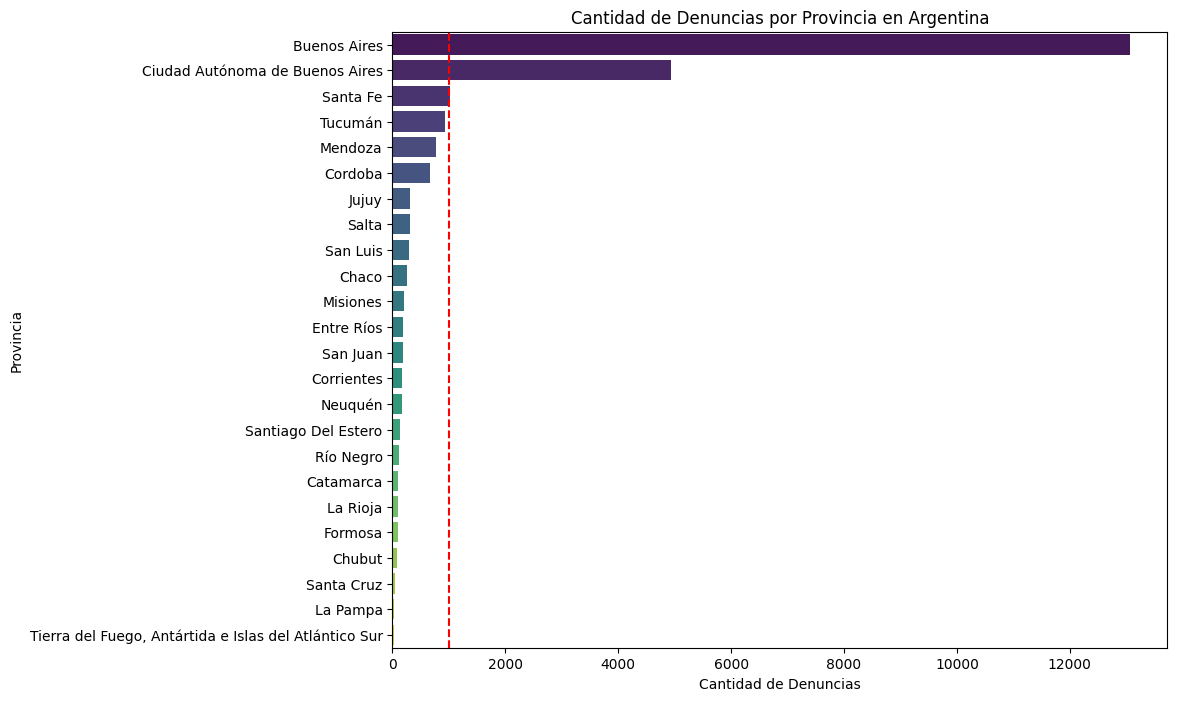

La media de denuncias por provincia es 1009.8333333333334


In [155]:

plt.figure(figsize=(10, 8))
sns.barplot(data=dfprovincias2, x='Denuncias', y='Provincia',hue= 'Provincia', palette='viridis', legend= False)
mean=dfprovincias2['Denuncias'].mean()
plt.axvline(mean, color='red', linestyle='--', label='Media')
plt.title('Cantidad de Denuncias por Provincia en Argentina')
plt.xlabel('Cantidad de Denuncias')
plt.ylabel('Provincia')
plt.show()
print(f'La media de denuncias por provincia es {mean}')


El gráfico muestra la cantidad de denuncias por provincia en Argentina. Se puede analizar que solo 3 provincias superan la media, y solo 2 de ellas en gran medida. CABA y Buenos Aires concencentran más del 50% de las denuncias, lo que se debe a la cantidad de población que tienen, comparado al interior del pais, donde no solo la densidad poblacional es menor, sino que la concientización sobre la violencia de género está mucho menos desarrollada. Esto confirma lahipotesis que las provincias mas urbanizadas y con mas habitantes son las que mayores denuncias presentan.

In [156]:
#Grafico 3
dfgenero=linea144['Género de la persona agresora'].value_counts().to_frame().reset_index()
dfgenero.columns = ['Género', 'Cantidad']
dfgenero = dfgenero[dfgenero['Género'] != 'Desconocido']
dfgenero

,Género,Cantidad
0,Varon,21143
2,Mujer,319
3,Otro,61
4,Varon Trans,12
5,Transgenero,4
6,Travesti,1
7,Mujer Trans,1


In [157]:
dfgenero2=linea144['Género'].value_counts().to_frame().reset_index()
dfgenero2.columns = ['Género', 'Cantidad']
dfgenero2 = dfgenero2[dfgenero2['Género'] != 'Desconocido']
dfgenero2

,Género,Cantidad
0,Mujer,23622
2,Varon,180
3,Transgenero,51
4,Mujer Trans,38
5,Otro,31
6,Varon Trans,8
7,Travesti,5
8,No Binarie,2
9,Varon trans,1
10,Intersexual,1


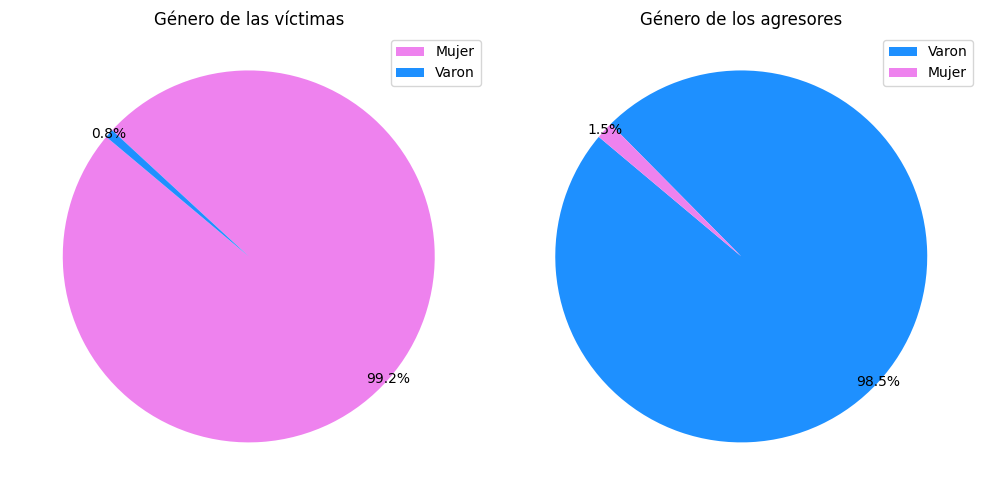

In [158]:
valores1 = dfgenero['Cantidad']
etiquetas1 = dfgenero['Género']
datos_ordenados1 = sorted(zip(valores1, etiquetas1,range(2)), reverse=True)

valores_ordenados1 = [d[0] for d in datos_ordenados1]
etiquetas_ordenadas1 = [d[1] for d in datos_ordenados1]

valores_seleccionados1 = valores_ordenados1[:3]
etiquetas_seleccionadas1 = etiquetas_ordenadas1[:3]

valores2 = dfgenero2['Cantidad']
etiquetas2 = dfgenero2['Género']
datos_ordenados2 = sorted(zip(valores2, etiquetas2,range(2)),reverse=True)

valores_ordenados2 = [d[0] for d in datos_ordenados2]
etiquetas_ordenadas2 = [d[1] for d in datos_ordenados2]

valores_seleccionados2 = valores_ordenados2[:3]
etiquetas_seleccionadas2 = etiquetas_ordenadas2[:3]

colors_dict = {'Varon': 'dodgerblue', 'Mujer': 'violet','Desconocido':'orange'}
colors1 = [colors_dict[label] for label in etiquetas_seleccionadas1]
colors2 = [colors_dict[label] for label in etiquetas_seleccionadas2]
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(valores_seleccionados1, startangle=140, pctdistance=1, colors=colors1, autopct='%1.1f%%')
ax1.legend(etiquetas_seleccionadas1, loc='upper right')
ax1.axis('equal')
ax1.set_title('Género de los agresores')

ax2.pie(valores_seleccionados2, startangle=140, pctdistance=1, colors=colors2, autopct='%1.1f%%')
ax2.legend(etiquetas_seleccionadas2, loc='upper right')
ax2.axis('equal')
ax2.set_title('Género de las víctimas')

plt.tight_layout()
plt.show()

Los dos gráficos de tortas muestran el género predominante en las víctimas de violencia de género y en los agresores. Los datos afirman la hipotesis, siendo 99% de las víctimas mujeres y 98% de los agresores, hombres. Esto se debe a la gran discriminación y machismo que hay en la sociedad.

In [159]:
dfedad=linea144['Edad'].dropna()
dfedad.columns = ['Edad','Denuncias']
dfedad.reset_index(drop=True, inplace=True)
dfedad

,Edad
0,31.0
1,31.0
2,29.0
3,43.0
4,30.0
...,...
19572,43.0
19573,28.0
19574,27.0
19575,41.0


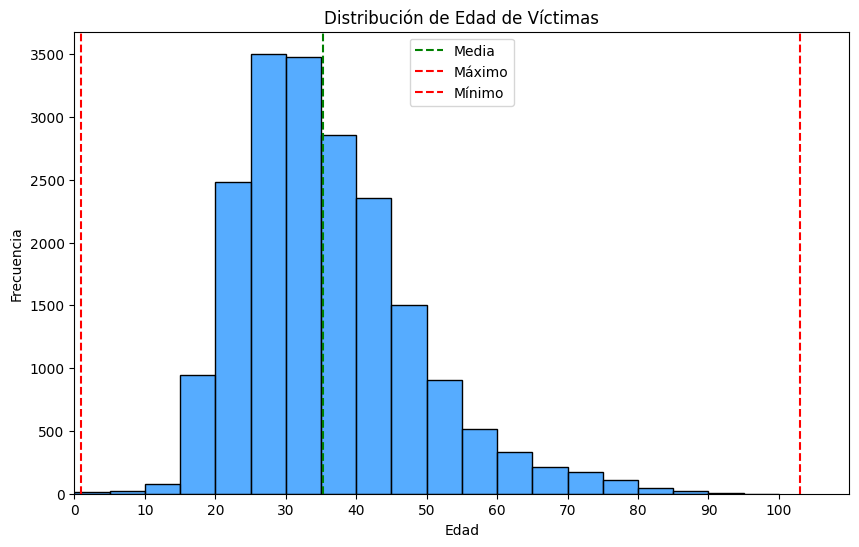

La media de edad es 35.33651734177862
El maximo es 103.0
El minimo es 1.0


In [160]:
from types import FrameType
#Grafico 4
plt.figure(figsize=(10, 6))

sns.histplot(dfedad, bins=20, color='dodgerblue', edgecolor='black',binrange=(0, 100),binwidth=5)

plt.title('Distribución de Edad de Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.xlim(0,110)
plt.xticks(range(0, 101, 10))
mean=linea144['Edad'].mean()
plt.axvline(mean, color='green', linestyle='--', label='Media')
plt.axvline(linea144['Edad'].max(), color='red', linestyle='--', label='Máximo')
plt.axvline(linea144['Edad'].min(), color='red', linestyle='--', label='Mínimo')
plt.legend()

plt.show()
print(f'La media de edad es {mean}')
print(f'El maximo es {linea144["Edad"].max()}')
print(f'El minimo es {linea144["Edad"].min()}')

El histograma muestra las edades de las victimas de violencia de género. La media es 35 años y en el intervalo de 20 a 45 años es donde se registraron más denuncias. Esto se debe a la concientización y acceso que tienen las personas más jóvenes a la linea 144. Lo que llama la atención es el mínimo de edad, siendo de solo 1 año, y el máximo, 103 años. Además, hay un aumento abrupto desde los 15 años, comparado con la disminución atenuada observada desde los 50 años.

In [161]:
dfedad2 = linea144[['Edad', 'Fecha']]
dfedad2.columns = ['Edad', 'Fecha']
dfedad2

,Edad,Fecha
1,31.0,2022-01-01
2,31.0,2022-01-01
3,29.0,2022-01-01
4,NaN,2022-01-01
5,NaN,2022-01-01
...,...,...
24554,NaN,2022-12-31
24555,NaN,2022-12-31
24556,NaN,2022-12-31
24557,NaN,2022-12-31


In [162]:
dfedad2 = dfedad2.dropna(subset=['Edad'])
dfedad2

,Edad,Fecha
1,31.0,2022-01-01
2,31.0,2022-01-01
3,29.0,2022-01-01
7,43.0,2022-01-01
8,30.0,2022-01-01
...,...,...
24543,43.0,2022-12-31
24548,28.0,2022-12-31
24551,27.0,2022-12-31
24552,41.0,2022-12-31


In [163]:
dfedad2.loc[:, 'Z_Score'] = (dfedad2['Edad'] - dfedad2['Edad'].mean()) / dfedad2['Edad'].std()
dfedad2.head()

<ipython-input-163-27959468bf0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfedad2.loc[:, 'Z_Score'] = (dfedad2['Edad'] - dfedad2['Edad'].mean()) / dfedad2['Edad'].std()


,Edad,Fecha,Z_Score
1,31.0,2022-01-01,-0.353320
2,31.0,2022-01-01,-0.353320
3,29.0,2022-01-01,-0.516271
7,43.0,2022-01-01,0.624386
8,30.0,2022-01-01,-0.434796


In [164]:
dfedad_z = pd.DataFrame()

for j in dfedad2.columns[1:]:

    dfedad_z[j] = (dfedad2[j] - dfedad2[j].mean()) / dfedad2[j].std()


dfedad_z['Fecha'] = dfedad2['Fecha']


dfedad_z


,Fecha,Z_Score
1,2022-01-01,-0.353320
2,2022-01-01,-0.353320
3,2022-01-01,-0.516271
7,2022-01-01,0.624386
8,2022-01-01,-0.434796
...,...,...
24543,2022-12-31,0.624386
24548,2022-12-31,-0.597747
24551,2022-12-31,-0.679222
24552,2022-12-31,0.461435


In [101]:
dfedad_z['Label']= dfedad_z['Z_Score'].apply(lambda x: 'Atípico' if (x>2 or x<-2) else 'Normal')
dfedad_z.head()

,Fecha,Z_Score,Label
1,2022-01-01,-0.353320,Normal
2,2022-01-01,-0.353320,Normal
3,2022-01-01,-0.516271,Normal
7,2022-01-01,0.624386,Normal
8,2022-01-01,-0.434796,Normal


In [102]:
linea144['Edad'].describe()

,Edad
count,19577.000000
mean,35.336517
std,12.273620
min,1.000000
25%,26.000000
50%,33.000000
75%,42.000000
max,103.000000


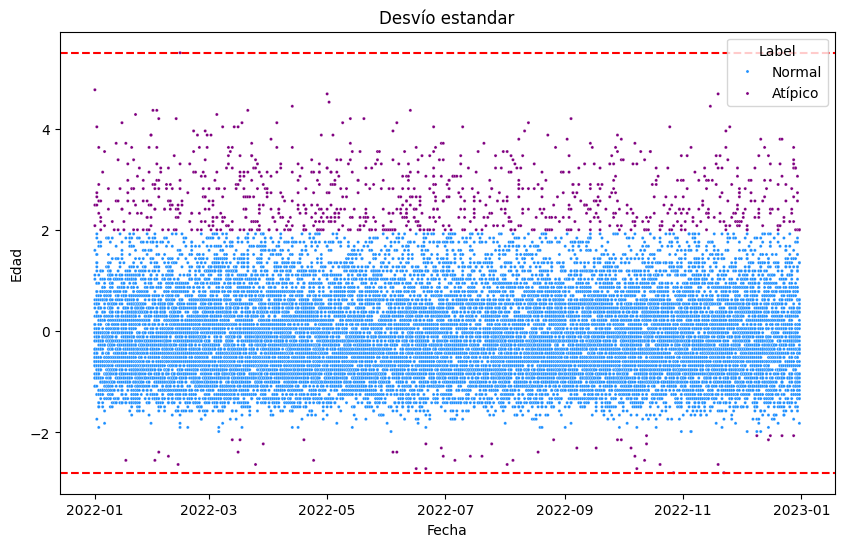

La media de desvío es 1.742149017545324e-17
El maximo es 5.512919639429857
El minimo es -2.797586724278892


In [103]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=dfedad_z.Fecha, y= dfedad_z.Z_Score, hue= dfedad_z['Label'],s= 5,palette=['dodgerblue','purple'])
plt.title('Desvío estandar')
plt.xlabel('Fecha')
plt.ylabel('Edad')
plt.axhline(y=max(dfedad_z['Z_Score']), color='red', linestyle='--', label='Máximo')
plt.axhline(y=min(dfedad_z['Z_Score']), color='red', linestyle='--', label='Mínimo')
plt.show()
print(f'La media de desvío es {dfedad_z["Z_Score"].mean()}')
print(f'El maximo es {dfedad_z["Z_Score"].max()}')
print(f'El minimo es {dfedad_z["Z_Score"].min()}')

El gráfico de dispersión muestra la distribución de la edad de las víctimas con respecto a los meses del año en que se registraron las denuncias. Se puede observar que no hay grandes patrones con respecto a las fechas. Al observar el gráfico, se puede analizar que se mantiene la media durante el año y las variaciones son mayoriariamente superando la media, con pocas fechas registando menos que eso. Al comparar el máximo y el mínimo, vemos que fue mucho más frecuente registrar mayores denuncias que la media, que menores a esta.

In [104]:
#Grafico 5
dfnacionalidad=linea144['Nacionalidad'].value_counts().to_frame().reset_index()
dfnacionalidad.columns = ['Nacionalidad', 'Denuncias']
dfnacionalidad

,Nacionalidad,Denuncias
0,Argentina,14733
1,Otro,8185
2,Paraguaya,657
3,Boliviana,350
4,Peruana,266
5,Venezolana,132
6,Colombiana,59
7,Brasileña,49
8,Uruguaya,43
9,Chilena,35


In [105]:
#Grafico 5
dfnacionalidad=dfnacionalidad.loc[dfnacionalidad['Denuncias'] > 50]
dfnacionalidad.value_counts()
dfnacionalidad

,Nacionalidad,Denuncias
0,Argentina,14733
1,Otro,8185
2,Paraguaya,657
3,Boliviana,350
4,Peruana,266
5,Venezolana,132
6,Colombiana,59


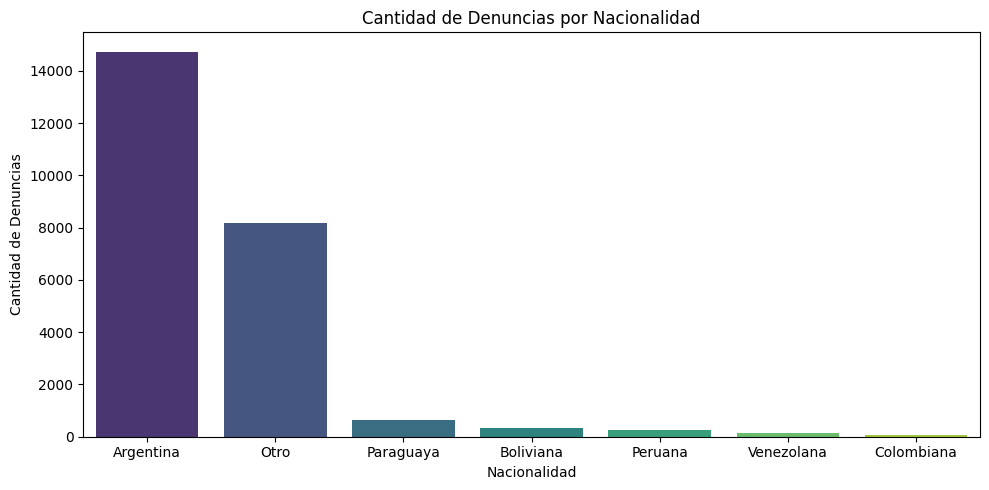

In [167]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfnacionalidad, x='Nacionalidad', y='Denuncias', hue='Nacionalidad', palette="viridis", estimator=sum, legend=False)

plt.title('Cantidad de Denuncias por Nacionalidad')
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de Denuncias')
plt.grid(False)
plt.tight_layout()

plt.show()

El gráfico de barras muestra la distribución de denuncias por nacionalidad. Como se anticipaba, la nacionalidad más frecuente es la argentina, y las diferentes a estas, son nacionalidades de países limítrofes como Paraguay y Bolivia. Esto es porque la mayoría de la población inmigrante en el país proviene de estos países.

In [107]:
dfp=linea144.loc[linea144['Violencia psicológica'] == 'Si', ['Edad', 'Violencia psicológica']]
dfp.value_counts()
dfpsico=dfp.value_counts().to_frame().reset_index()
dfpsico.columns = ['Edad', 'Violencia psicológica','Denuncias']
dfpsico

,Edad,Violencia psicológica,Denuncias
0,30.0,Si,771
1,28.0,Si,716
2,27.0,Si,679
3,33.0,Si,669
4,26.0,Si,664
...,...,...,...
88,91.0,Si,1
89,1.0,Si,1
90,7.0,Si,1
91,5.0,Si,1


In [108]:
dfs=linea144.loc[linea144['Violencia sexual'] == 'Si', ['Edad', 'Violencia sexual']]
dfs.value_counts()
dfsexual=dfs.value_counts().to_frame().reset_index()
dfsexual.columns = ['Edad', 'Violencia sexual','Denuncias']
dfsexual

,Edad,Violencia sexual,Denuncias
0,28.0,Si,113
1,23.0,Si,106
2,34.0,Si,104
3,29.0,Si,103
4,27.0,Si,101
...,...,...,...
73,75.0,Si,1
74,77.0,Si,1
75,7.0,Si,1
76,79.0,Si,1


In [109]:
dfedad=linea144.loc[linea144['Violencia física'] == 'Si', ['Edad', 'Violencia física']]
dfedad.value_counts()
dfedad2=dfedad.value_counts().to_frame().reset_index()
dfedad2.columns = ['Edad', 'Violencia física','Denuncias']
dfedad2

,Edad,Violencia física,Denuncias
0,30.0,Si,543
1,28.0,Si,531
2,26.0,Si,511
3,27.0,Si,489
4,29.0,Si,478
...,...,...,...
84,7.0,Si,1
85,4.0,Si,1
86,90.0,Si,1
87,93.0,Si,1


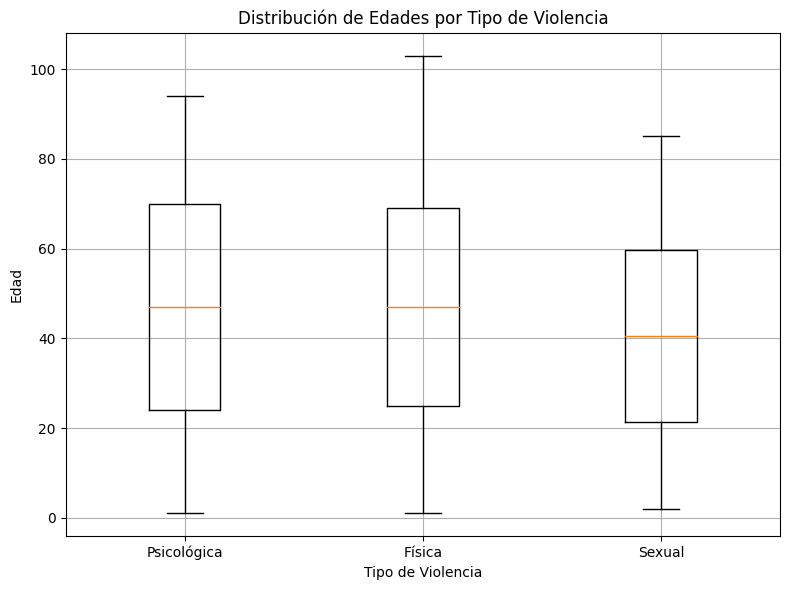

In [110]:
#Grafico 6
data = [dfpsico['Edad'], dfedad2['Edad'], dfsexual['Edad']]
labels = ['Psicológica', 'Física', 'Sexual']

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.title('Distribución de Edades por Tipo de Violencia')
plt.xlabel('Tipo de Violencia')
plt.ylabel('Edad')
plt.grid(True)
plt.tight_layout()
plt.show()

El boxplot grafica la distribución por edad según sea una denuncia de violencia física, psicológica o sexual. La hipotesis establecia que la violencia sexual predomina en las denuncias de personas más jóvenes,sin embargo, la media es de 40 años y el 50% de las personas denunciantes tienen entre 20 y 60 años; por lo que la hipotesis alternativa que se verifica es que la violencia sexual no predomina en las personas jovenes. Por otro lado, la violencia física sí tiene una media mayor,confirmando la hipótesis, y su distribución es muy similar a la distribución de la violencia psicológica, solo aumentando el máximo de edad registrado, superando los 100 años. Es llamativo como los 3 tipos de violencia tienen registros en personas menores a 10 años.

# Preprocesamiento de datos

In [111]:
violencia_cols = [
    'Violencia física', 'Violencia psicológica', 'Violencia sexual',
    'Violencia económica y patrimonial', 'Violencia simbólica',
    'Violencia doméstica'
]

for col in violencia_cols:
    linea144[col] = linea144[col].map({'Si': 1, 'No': 0})



In [112]:
modalidad_cols = [
    'Modalidad de violencia institucional', 'Modalidad de violencia laboral',
    'Modalidad de violencia contra la libertad reproductiva', 'Modalidad de violencia obstétrica',
    'Modalidad de violencia mediática', 'Otras modalidades'
]

for col in modalidad_cols:
    linea144[col] = linea144[col].map({'Si': 1, 'No': 0})


In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Lista de columnas a codificar
cols_to_encode = ['Provincia', 'Género', 'Nacionalidad', 'Vínculo', 'Género de la persona agresora']

# Iterar sobre cada columna y aplicar LabelEncoder
for col in cols_to_encode:
    linea144[col] = le.fit_transform(linea144[col])


In [114]:
mediana_edad = linea144['Edad'].median()
linea144['Edad'].fillna(mediana_edad, inplace=True)


In [115]:
linea144['Edad'] = pd.to_numeric(linea144['Edad'], errors='coerce')

# Verificar la cantidad de NaN después de la conversión
print(linea144['Edad'].isna().sum())


0


In [116]:
linea144['Mes'] = linea144['Fecha'].dt.month

# Eliminar la columna 'Fecha'
linea144.drop(columns=['Fecha'], inplace=True)

# Selección de variables


In [117]:
objetivo = 'Violencia física'
# Seleccionar variables independientes excluyendo la variable objetivo
variables_independientes = [col for col in linea144.columns if col != objetivo]


In [118]:
# Variable objetivo
y = linea144[objetivo]

# Variables independientes
X = linea144[variables_independientes]


In [119]:
X.columns

Index(['Provincia', 'Género', 'Edad', 'Nacionalidad', 'Violencia psicológica',
       'Violencia sexual', 'Violencia económica y patrimonial',
       'Violencia simbólica', 'Violencia doméstica',
       'Modalidad de violencia institucional',
       'Modalidad de violencia laboral',
       'Modalidad de violencia contra la libertad reproductiva',
       'Modalidad de violencia obstétrica', 'Modalidad de violencia mediática',
       'Otras modalidades', 'Vínculo', 'Género de la persona agresora', 'Mes'],
      dtype='object')

In [120]:
y.sample(5)

,Violencia física
18323,1
9695,0
15575,1
6719,1
1511,1


# Modelo

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [122]:
#Creo los grupos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [123]:
# Creo el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [124]:
y_pred = modelo.predict(X_test)

In [125]:
#Evaluación del modelo
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.72      0.25      0.38      2712
           1       0.68      0.94      0.79      4656

    accuracy                           0.69      7368
   macro avg       0.70      0.60      0.58      7368
weighted avg       0.70      0.69      0.64      7368



In [126]:
# Calculo la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)


Matriz de Confusión:
[[ 691 2021]
 [ 272 4384]]


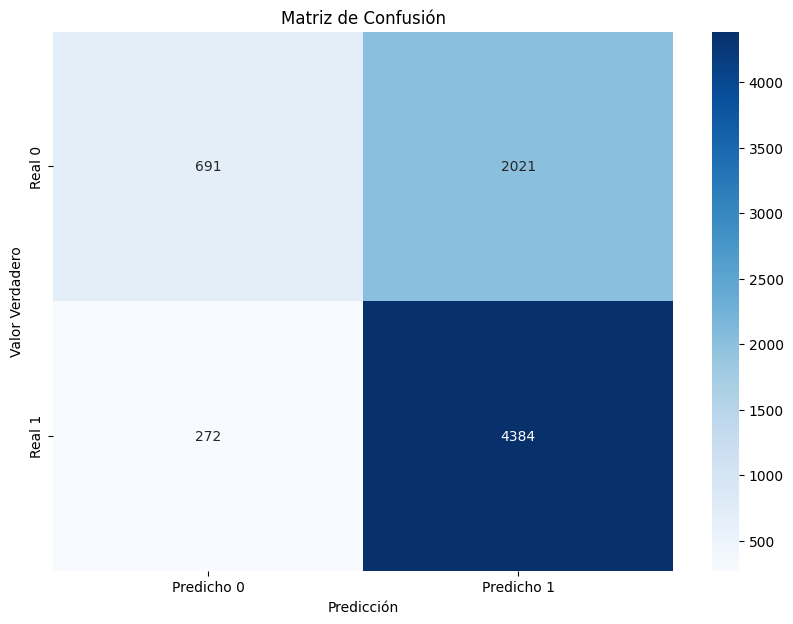

In [127]:
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicho 0', 'Predicho 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.title('Matriz de Confusión')
plt.show()

Evaluación del modelo
- Precisión (Precision)
La precisión para la clase 1 es ligeramente menor en comparación con la clase 0. El modelo es razonablemente bueno en identificar correctamente tanto los casos con violencia física como los sin violencia física.
- Recuperación (Recall)
La recuperación para la clase 1 es alta, indicando que el modelo es muy efectivo para identificar casos de violencia física. Sin embargo, la recuperación para la clase 0 es baja, lo que sugiere que el modelo tiene dificultades para identificar correctamente los casos sin violencia física.
- F1-Score
El F1-Score para la clase 1 es alto, lo que indica un buen equilibrio entre precisión y recuperación para los casos de violencia física. El F1-Score para la clase 0 es bajo, reflejando un desequilibrio en el modelo al identificar correctamente los casos sin violencia física.
- Exactitud (Accuracy)
La exactitud general del modelo es del 69%, lo que es aceptable pero muestra que el modelo tiene dificultades en clasificar bien ambas clases.

El modelo es muy bueno para detectar la clase 1 (alta recall de 0.94 y un buen F1-score de 0.79). Esto puede ser crítico si esta clase es la más importante en tu caso de uso.
Sin embargo, tiene dificultades para identificar la clase 0 (baja recall de 0.25 y un F1-score de 0.38). Esto sugiere que el modelo tiene un alto número de falsos negativos para esta clase.


# SMOTE para la clase desbalanceada

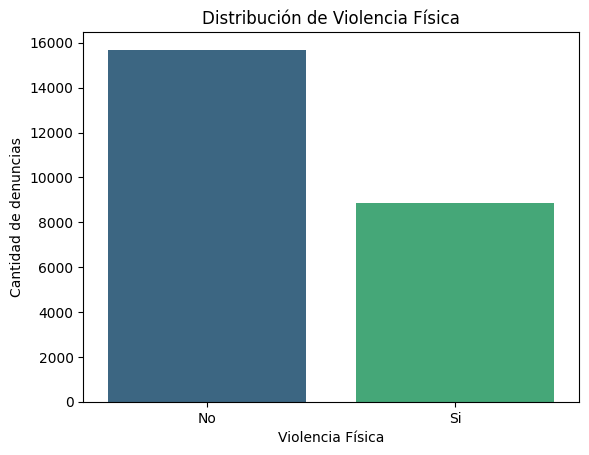

In [168]:
#Variable objetivo sin SMOTE
grafico = sns.countplot(data=linea144, x='Violencia física', hue='Violencia física', palette='viridis', legend=False)
grafico.set_title('Distribución de Violencia Física')
grafico.set_xlabel('Violencia Física')
grafico.set_ylabel('Cantidad de denuncias')
plt.xticks(ticks=[0, 1], labels=['No', 'Si'])

plt.show()
plt.show()


In [129]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [130]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

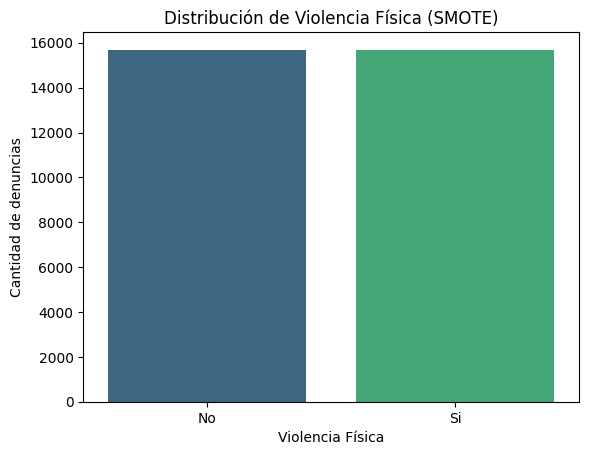

In [169]:
# Gráfico de barras con los datos balanceados por SMOTE
grafico_smote = sns.countplot(x=y_resampled, hue=y_resampled, palette='viridis', legend=False)
grafico_smote.set_title('Distribución de Violencia Física (SMOTE)')
grafico_smote.set_xlabel('Violencia Física')
grafico_smote.set_ylabel('Cantidad de denuncias')
plt.xticks(ticks=[0, 1], labels=['No', 'Si'])
plt.show()


In [174]:
# Creo los grupos de datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, shuffle=True)


In [177]:
# Creo el modelo de regresión logistica
modelo2 = LogisticRegression(max_iter=1000)

In [178]:
# Entreno el modelo con mis datos de entrenamiento
modelo2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [179]:
y_pred = modelo2.predict(X_test)

In [172]:
#Evalacuaión del modelo
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62      4710
           1       0.63      0.70      0.66      4704

    accuracy                           0.64      9414
   macro avg       0.65      0.64      0.64      9414
weighted avg       0.65      0.64      0.64      9414



In [173]:
# Calculo la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)

Matriz de Confusión:
[[2747 1963]
 [1393 3311]]


In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicho 0', 'Predicho 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.title('Matriz de Confusión')
plt.show()

Conclusión del Modelo con SMOTE
- Exactitud Total: 60%. Esto indica que el modelo clasifica correctamente el 60% de las instancias. Esto es moderadamente bajo y sugiere que hay margen para mejorar.
- Precisión:
Clase 0 (Violencia Física No): 82%. Cuando el modelo predice que no hay violencia física, es bastante preciso.
Clase 1 (Violencia Física Sí): 56%. Cuando el modelo predice que hay violencia física, la precisión es más baja, indicando que hay una cantidad significativa de falsos positivos (casos en los que el modelo predice que hay violencia física, pero en realidad no la hay).
- Recuperación:
Clase 0 (Violencia Física No): 27%. La recuperación para la clase 0 es baja, lo que significa que el modelo está perdiendo una gran cantidad de casos en los que realmente no hay violencia física. Esto es preocupante si se desea identificar todos los casos sin violencia.
Clase 1 (Violencia Física Sí): 94%. La alta recuperación para la clase 1 indica que el modelo es muy eficaz en identificar casos donde hay violencia física. Esto es positivo si el objetivo es detectar la violencia física.
- F1-Score:
Clase 0 (Violencia Física No): 0.40. La F1-Score para la clase 0 es relativamente baja, indicando un equilibrio deficiente entre precisión y recuperación para esta clase.
Clase 1 (Violencia Física Sí): 0.70. La F1-Score para la clase 1 es bastante buena, reflejando un buen equilibrio entre precisión y recuperación para identificar la violencia física.

El modelo está muy enfocado en detectar casos de violencia física (alta recuperación para clase 1). Esto es positivo si la prioridad es identificar todos los casos de violencia física.
El modelo tiene dificultades para identificar correctamente los casos sin violencia física (baja recuperación para clase 0).